<a href="https://colab.research.google.com/github/AlienX77-cmd/Machine-Learning-Practice-Project/blob/main/ML_Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

##*Using gold.csv file*

In [2]:
from google.colab import files
uploaded = files.upload()

Saving gold.csv to gold.csv


##**Data Collection and Processing**

In [3]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/gold.csv')

In [4]:
# Showing first 5 rows of dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
# Showing number of rows and columns
gold_data.shape

(2290, 6)

In [8]:
# Showing information about the dataset
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
# Checking for the missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
# Showing the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


##**Correlation**
1. Positive Correlation (move in the same direction) 
2. Negative Correlation (move in opposite direction)

In [12]:
correlation = gold_data.corr()

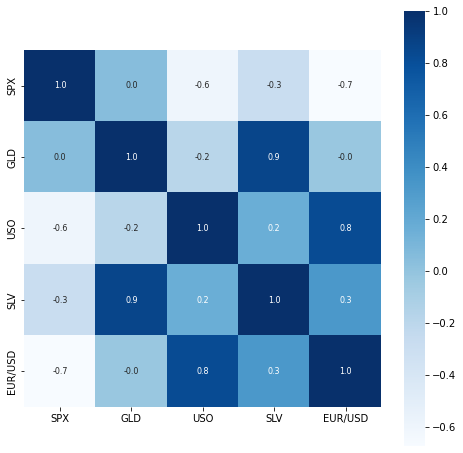

In [13]:
# Create a Heatmap to understand the Correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [14]:
# Correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


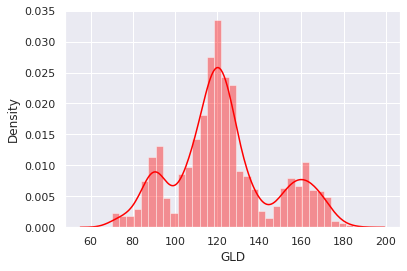

In [21]:
# Checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'], color='red')

##**Features and Targets Splitting**

In [23]:
# X = Features, Y = Targets
X = gold_data.drop(['Date', 'GLD'], axis=1)
Y = gold_data['GLD']

In [24]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


###**Splitting into Training data and Test Data**

In [25]:
#Test data = 20% of data, Training data = 80% of data => test_size = 0.2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

##**Random Forest Regressor Model Training**

In [26]:
regressor = RandomForestRegressor(n_estimators=100)

In [27]:
# Training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

##**Model Evaluation**

In [28]:
# Prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [29]:
print(test_data_prediction)

[168.57939944  82.05189967 115.98380041 127.56800091 120.87210112
 154.76999707 150.28629892 126.1068002  117.50829868 126.21110074
 116.55930101 172.08380082 141.69559837 167.89369853 115.26200015
 117.59270053 138.58540332 170.26020088 159.54200265 156.84459997
 155.04720011 124.97960065 175.3473997  157.16730332 125.24100045
  94.0506      77.61650013 120.66160004 119.19129954 167.52069973
  88.21880075 125.15419978  91.09070075 117.76000003 121.14789923
 136.7621012  115.51290121 115.32690084 147.88559996 107.10150108
 104.33950252  87.19319779 126.59260076 117.93500042 154.38869934
 119.77960016 108.34740003 108.03179829  93.1011002  126.98589833
  75.03800032 113.61369902 121.15389998 111.31239909 118.9114989
 120.75149915 159.11929955 167.9072011  147.06479675  85.89759873
  94.21120044  86.7789987   90.50549944 119.03880066 126.51030075
 127.39970054 169.52659971 122.33409943 117.27469864  98.36820046
 168.54710106 143.00399846 131.65160246 121.19910215 120.55369961
 119.815701

In [30]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9890746836472617


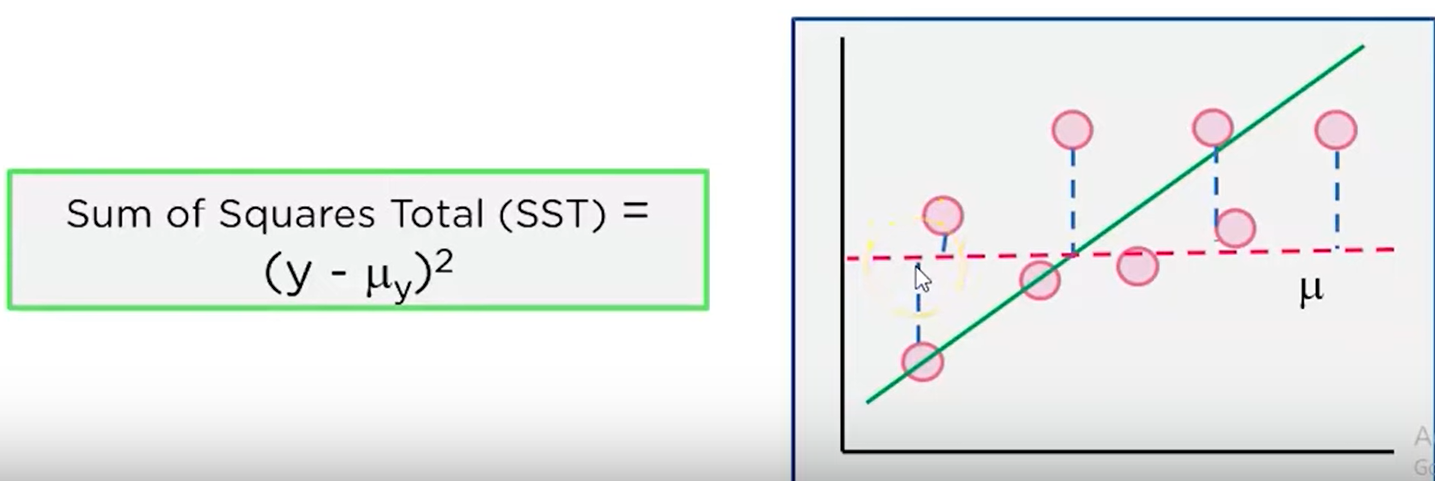

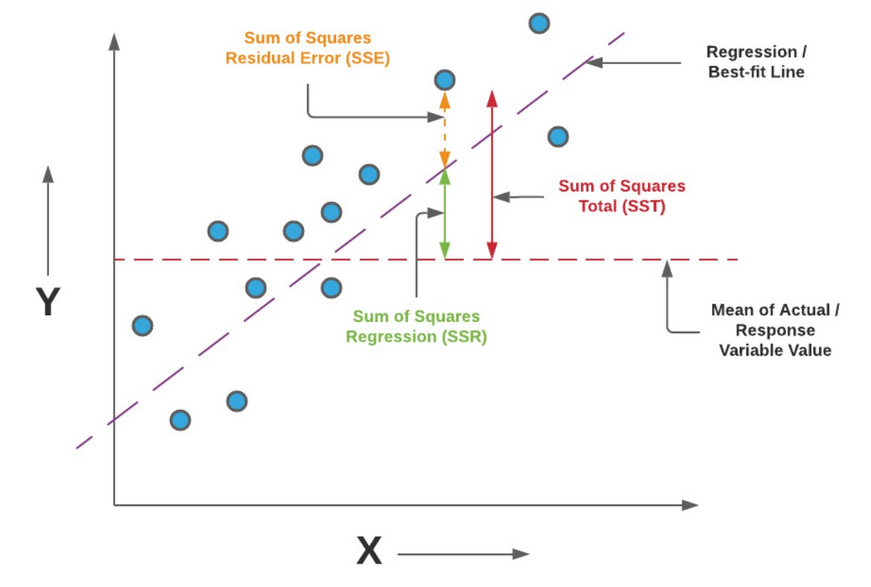

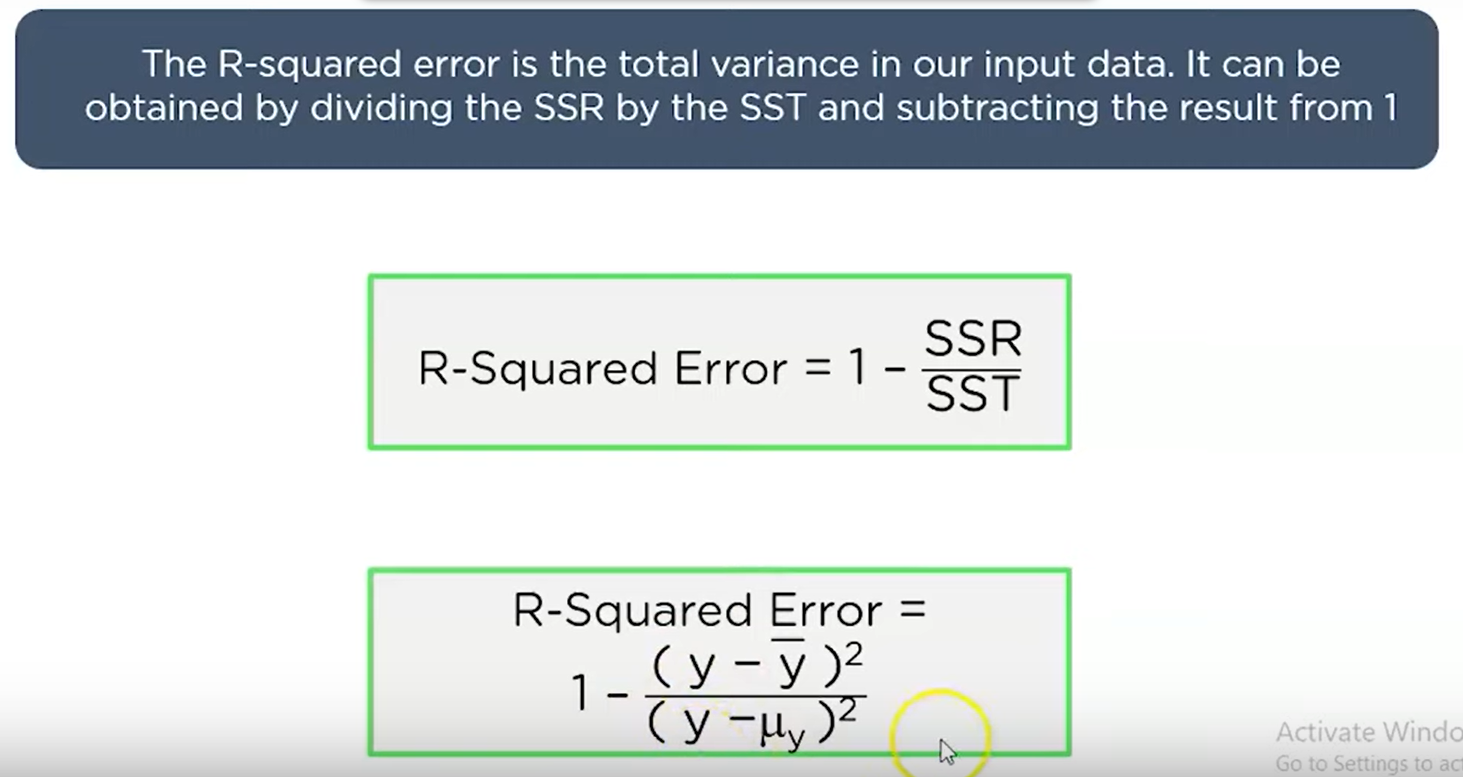

###**- Compare the Actual Values and Predicted Values in a Plot**

In [32]:
Y_test = list(Y_test)

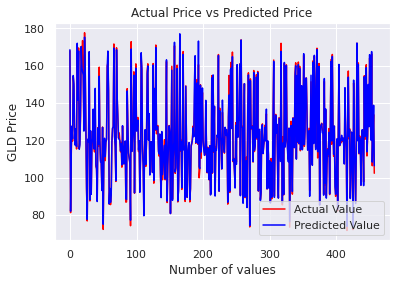

In [35]:
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(test_data_prediction, color='blue', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()